# Lead Score Case Study

**1. Reading And Understanding The Dataset**

In [1]:
# Importing the necessary python libraries for data reading and basic analysis.

import numpy as np
import pandas as pd

# Importing libraries for data visualisations.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our dataset and storing it in a variable ' df '.

df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# # Fetching the number of rows and columns of our dataset.

df.shape

(9240, 37)

**We have `9240 rows and 37 columns` in our dataframe.**

In [4]:
# Checking the info about datatypes and null , non-null entries of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**We have `4 float values , 3 integer type values and 30 object type values ` in the dataset.**

 **2. Data Cleaning**

In [5]:
# For the values where cutsomers failed to chose any option , the system is showing " SELECT " by default. We can replace
# these with nan ( NULL ).

df = df.replace('Select', np.nan)

In [6]:
# Checking the null percentage value in our dataframe.

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Some of the columns have missing value percentages greater than 40 . We may remove such columns and for any column with missing values less than 40% we will inspect them.**

In [7]:
# Dropping columns with more than 40% null values.

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>40)].columns, 1)

In [8]:
# Inspecting the shape again to check how many rows have we dropped.

df.shape

(9240, 30)

**In the beginning we had 37 columns and we are now left with 30 columns . This means that 7 columns have missing values percentages greater than 40 and are therefore removed succesfully. For other null value columns we will perform individual check.**

In [9]:
# check for percentage of null values in each column after dropping columns having more than 40% null values

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# Following columns have null values percentages less than 40 :
    - Country
    - Lead Source
    - Total Visits
    - Page Views Per Visit
    - Last Activity    
    - What is your current occupation
    - What matters most to you in choosing a course
    - Tags
    - City 
    - Specialization
    
Let us see these columns individually and decide whether we need to impute values in the above column or drop these columns.

In [10]:
# Checking the value counts for each values in the "country" column.

df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
Netherlands                2
Ghana                      2
Belgium                    2
Italy                      2
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Uganda                     2
Philippines                2
Malaysia                   1
Kenya                      1
Russia                     1
Denmark                    1
Indonesia                  1
Tanzania                   1
Switzerland   

In [11]:
# Checking the percentage of India as value in the country column.

india_percentage = round(100*len(df[df['Country'] == 'India'])/len(df['Country']),2)
print(india_percentage)

70.26


In [12]:
# "India" occurs for 70.26 % in the entire Country column, and country column also has around 27% missing values, so it's 
# good to drop this column.

df = df.drop(['Country'], axis=1)

In [13]:
# Checking the value counts for the column - 'Lead Source'.

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [14]:
# From above ,it can be noticed that Google appears twice as upper and lower cases. We will merge both cases.
# Also "Google" has the major portion of data, so we can impute the null values with Google.

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

In [15]:
# Checking the value counts for the column - 'Total Visits'.

df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [16]:
# Since it's a numeric column , we may impute the missing values with the median of this column.

df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())

In [17]:
# Checking the value counts for - 'Page Views Per Visit'.

df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [18]:
# Again , because it is a numeric column we will impute the missing values with median of this column.

df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

In [19]:
# Checking the value counts for the column - 'Last Activity'.

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [20]:
# We can drop this column as it is a sales generated column , so it is not of much importance to model building.

df = df.drop(['Last Activity'], axis=1)

In [21]:
# Checking the value counts for the column - "What is your current Occupation".

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# We shall add a new category called "No Information" .

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'No Information')

In [23]:
# Checking the value counts for the column - "What matters most to you in choosing a course "."

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# "Better Career Prospects" occurs large number of times . We may drop this column as a whole .

df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [25]:
#  " Tags " is also a sales generated column and so it can be dropped , also it has 36% missing data.

df = df.drop(['Tags'], axis=1)

In [26]:
# Checking value counts for the column - " City ".

df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
# Mumbai has the majority customers . Since its a worldwide facility and we having a large number of missing values , we 
# may drop this column too.

df = df.drop(['City'], axis=1)

In [28]:
# Checking value counts for the column - " Specialization".

df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [29]:
# Specialization had almost 37 % missing values and the remaining data seems to be scattered so imputing won't do much 
# good here and it's better to drop this column too.

df = df.drop(['Specialization'], axis=1)

In [30]:
# Now again we'll check for percentage of null values in each column.

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

**All the null values in the columns have either been imputed or dropped , depending on the individual columns.**

In [31]:
# There are some columns which have only one value in all the rows . These columns are unecessary and we can drop them.
# The following columns have only one value - " No " , so we can drop these:

# 1.) Magazine
# 2.) Receive More Updates About Our Courses
# 3.) Update me on Supply Chain Content
# 4.) Get updates on DM Content
# 5.) I agree to pay the amount through cheque

df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [32]:
# Let's again check the remaining size of our dataset after we drop all these columns.

df.shape

(9240, 19)

**Now we are left with only `9240 rows with 19 columns`.**

**Checking For Outliers**

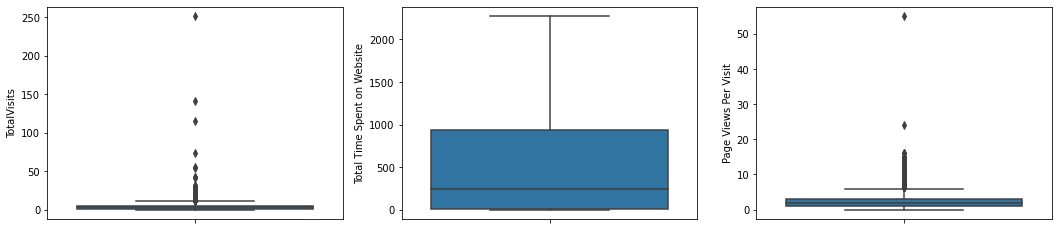

In [33]:
# Checking the outliers in all the numeric columns.

plt.figure(figsize=(18, 18))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data =df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

In [34]:
# We can remove values beyond 99% for these 2 columns:
# 1. Total Visits
# 2. Page Views Per Visit

total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < total_visits]

page_visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < page_visits]

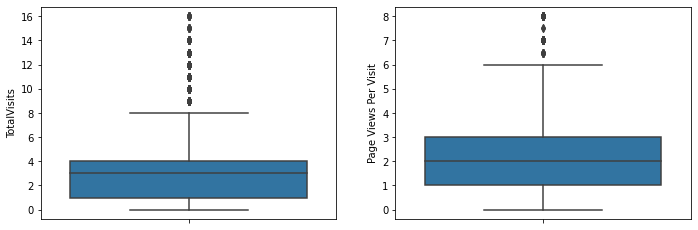

In [35]:
# Checking the outliers in all the numeric columns.

plt.figure(figsize=(18, 18))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data =df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

In [36]:
# Percentage of data we could retain.

round(100*(len(df)/9240),2)

97.72

After cleaning the data , we retained about 98% of data .

###  3: Data Analysis


In [37]:
# Our target variable is " Converted ". It indicates whether a lead has been successfully converted - 1 or not - 0.

converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.50924797873519

We have an overall `conversion rate of around 39%`.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

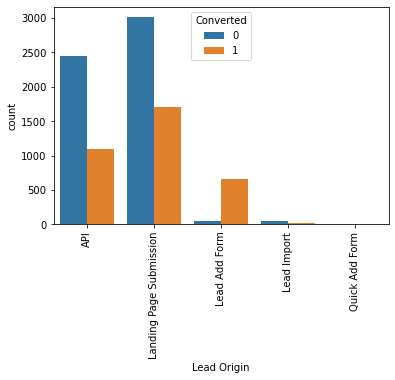

In [38]:
# Lead Origin

sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)

#### Inference:
1. `API and Landing Page Submission` have `good conversion rate`.
2. `Lead Add Form has the highest conversion rate` but count of lead are very less.
3. Lead Import are very less in count.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

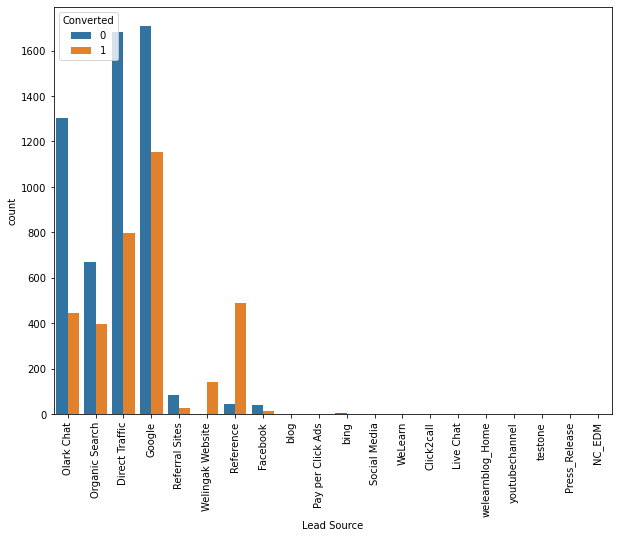

In [39]:
# Lead Source

fig, axs = plt.subplots(figsize = (10,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)

#### Inference:
1. `Google and Direct traffic` generates `maximum number of leads`.
2. Conversion Rate of reference leads and leads through welingak website is high.

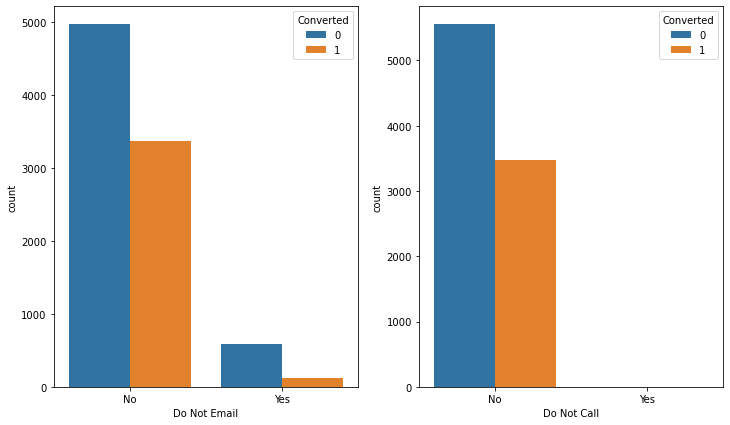

In [40]:
# Do not email and do not call column.

fig, axs = plt.subplots(1,2,figsize = (12,7))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

**INFERENCE :**

**Most customers prefer no calls and no emails. But it is also evident that major conversions happened only when calls were made**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

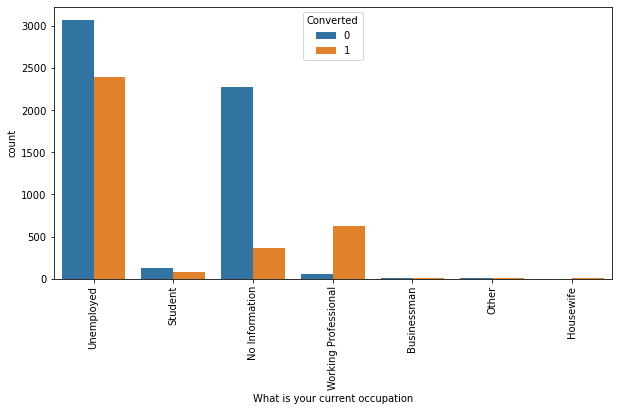

In [41]:
# Plot for Occupation.

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)

**Inference:**
1. Working Professionals have the highest chances of joining a course.
2. Unemployed leads are highest in number but still they have a less conversion rate.

In [42]:
# Search

df.Search.describe()

count     9029
unique       2
top         No
freq      9016
Name: Search, dtype: object

**Most of the values are - " No " , so no interference can be drawn here.**

In [43]:
# Newspaper Article

df['Newspaper Article'].describe()

count     9029
unique       1
top         No
freq      9029
Name: Newspaper Article, dtype: object

**This column has only one value for all rows - "No" , it is safe to drop this column.**

In [44]:
# Dropping Newspaper Article

df = df.drop(['Newspaper Article'], axis=1)

In [45]:
# X Education Forums 

df['X Education Forums'].describe()

count     9029
unique       1
top         No
freq      9029
Name: X Education Forums, dtype: object

**"X Education Forums" column also has only one value for all rows - "No" , we may drop this too.**

In [46]:
# Dropping X Education Forum column

df = df.drop(['X Education Forums'], axis=1)

In [47]:
# Newspaper 

df['Newspaper'].describe()

count     9029
unique       2
top         No
freq      9028
Name: Newspaper, dtype: object

**This column has value - "Yes" which did not get converted and rest of all the values are "No", so we can drop this too.**

In [48]:
# Dropping Newspaper column

df = df.drop(['Newspaper'], axis=1)

In [49]:
# Digital Advertisement

df['Digital Advertisement'].describe()

count     9029
unique       2
top         No
freq      9027
Name: Digital Advertisement, dtype: object

**No much interference can be drawn here.**

In [50]:
# Through Recommendations

df['Through Recommendations'].describe()

count     9029
unique       2
top         No
freq      9023
Name: Through Recommendations, dtype: object

**As can be seen that a total of 6 leads came through recommendations.**

In [51]:
# A free copy of Mastering The Interview

df['A free copy of Mastering The Interview'].describe()

count     9029
unique       2
top         No
freq      6269
Name: A free copy of Mastering The Interview, dtype: object

**Conversion rates are higher on leads who do not want a free copy of Mastering Interviews.**

In [52]:
# Last Notable Activity

df['Last Notable Activity'].describe()

count         9029
unique          16
top       Modified
freq          3344
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

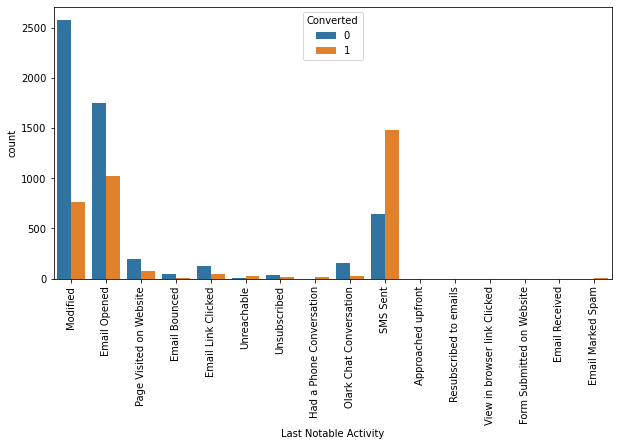

In [53]:
# Since values differ so a plot is sensible here.

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)

**SMS Sent has the highest rates of conversion . Email Opened and Modified also have good conversion rates.**

# `Result:`


**Based on the univariate analysis we concluded that many columns had single values , which were of no use to us. So we removed such columns and now can move on with Data Preparation.**

## 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [54]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df[variablelist] = df[variablelist].apply(binary_map)

In [55]:
# Creating dummies for the following columns:

# Lead Origin : 

d_lead_origin = pd.get_dummies(df['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
df = pd.concat([df, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(df['Lead Source'], prefix='LeadSource')
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
df = pd.concat([df,d_lead_source1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(df['What is your current occupation'], prefix='CurrentOccupation')
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
df = pd.concat([df,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(df['Last Notable Activity'], prefix='LastNotableActivity')
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
df = pd.concat([df,d_last_notable_activity1], axis=1)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# Removing some columns from the dataframe.

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source 
# e) What is your current occupation
# f) Last Notable Activity

df = df.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 
              'What is your current occupation', 'Last Notable Activity'], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [58]:
# check for percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
Page Views Per Visit                                0.0
Search                                              0.0
Digital Advertisement                               0.0
Through Recommendations                             0.0
A free copy of Mastering The Interview              0.0
LeadOrigin_API                                      0.0
LeadOrigin_Landing Page Submission                  0.0
LeadOrigin_Lead Add Form                            0.0
LeadOrigin_Lead Import                              0.0
LeadSource_Click2call                               0.0
LeadSource_Direct Traffic                           0.0
LeadSource_Facebook                                 0.0
LeadSource_Google                               

In [59]:
# check shape of the data frame

df.shape

(9029, 54)

Since there are around `54 columns`, we will not be looking at the correlation using heat map as heat maps for such a large amount of data will be messy.

# 5: Test-Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
# Putting response variable to y

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with MinMax Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Checking the Conversion Rate percentage.

sum(df['Converted'])/len(df['Converted'].index)*100

38.50924797873519

**We have almost `39% conversion rate`.**

# 7: Model Building

**Running the Initial Training Model.**

In [66]:
import statsmodels.api as sm

In [67]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 Jan 2021   Deviance:                          nan
Time:                        00:05:02   Pearson chi2:                 6.65e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             4.423e+15    6.7e+07    6.6e+07      0.000    4.42e+15    4.42e+15
Do Not Email                                      -5.34e+14   3.56e+06   -1.5e+08      0.000   -5.34e+14   -5.34e+14
Do Not Call                                       4.916e+15   4.75e+07   1.03e+08      0.000    4.92e+15    4.92e+15
TotalVisits                                       5.067e+14   7.57e+06   6.69e+07      0.000    5.07e+14    5.07e+14
Total Time Spent on Website                       2.268e+14   3.94e+06   5.75e+07      0.000    2.27e+14    2.27e+14
Page Views Per Visit                              2.049e+14   6.44e+06   3.18e+07      0.000    2.05e+14    2.05e+14
Search                                           -7.636e+14   2.44e+07  -3.13e+07      0.000   -7.64e+14   -7.64e+14
Digital Advertisement                             1.733e+14   4.75e+07   3.64e+06      0.000    1.73e+14    1.73e+14
Through Recommendations                           8.077e+14    4.2e+07   1.92e+07      0.000    8.08e+14    8.08e+14
A free copy of Mastering The Interview            3.878e+13   2.69e+06   1.44e+07      0.000    3.88e+13    3.88e+13
LeadOrigin_API                                   -5.715e+15   6.73e+07  -8.49e+07      0.000   -5.72e+15   -5.72e+15
LeadOrigin_Landing Page Submission               -5.812e+15   6.73e+07  -8.64e+07      0.000   -5.81e+15   -5.81e+15
LeadOrigin_Lead Add Form                         -5.584e+15   6.85e+07  -8.15e+07      0.000   -5.58e+15   -5.58e+15
LeadOrigin_Lead Import                           -4.956e+15   8.26e+07     -6e+07      0.000   -4.96e+15   -4.96e+15
LeadSource_Click2call                             5.748e+15   4.69e+07   1.23e+08      0.000    5.75e+15    5.75e+15
LeadSource_Direct Traffic                         6.945e+14   1.17e+07   5.93e+07      0.000    6.95e+14    6.95e+14
LeadSource_Facebook                               1.504e+14   4.62e+07   3.26e+06      0.000     1.5e+14     1.5e+14
LeadSource_Google                                 8.128e+14   1.15e+07   7.04e+07      0.000    8.13e+14    8.13e+14
LeadSource_Live Chat                              4.572e+15   4.68e+07   9.78e+07      0.000    4.57e+15    4.57e+15
LeadSource_Olark Chat                             7.982e+14   1.18e+07   6.74e+07      0.000    7.98e+14    7.98e+14
LeadSource_Organic Search                          7.69e+14   1.18e+07   6.51e+07      0.000    7.69e+14    7.69e+14
LeadSource_Pay per Click Ads                       -14.4789   2.67e-07  -5.41e+07      0.000     -14.479     -14.479
LeadSource_Press_Release                             3.8343   1.43e-07   2.69e+07      0.000       3.834       3.834
LeadSource_Reference                     

# 8: Feature Selection Using RFE

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([ True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False])

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Search', True, 1),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', False, 16),
 ('A free copy of Mastering The Interview', False, 25),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 11),
 ('LeadSource_Click2call', False, 18),
 ('LeadSource_Direct Traffic', False, 7),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 15),
 ('LeadSource_Live Chat', False, 23),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 14),
 ('LeadSource_Pay per Click Ads', False, 33),
 ('LeadSource_Press_Release', False, 34),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 12),
 ('LeadSource_Social Media', False, 22),
 ('LeadSource_WeLearn', False, 29),
 ('Lea

In [72]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Search',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Facebook',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.1
Date:                Sun, 10 Jan 2021   Deviance:                       5096.1
Time:                        00:05:06   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.6473      1.430     -0.453      0.651      -3.451       2.156
Do Not Email                                    -1.2541      0.171     -7.321      0.000      -1.590      -0.918
TotalVisits                                      1.3274      0.249      5.340      0.000       0.840       1.815
Total Time Spent on Website                      4.5316      0.169     26.834      0.000       4.201       4.863
Search                                          -1.6215      0.992     -1.634      0.102      -3.566       0.323
LeadOrigin_API                                  -1.4705      1.432     -1.027      0.305      -4.278       1.337
LeadOrigin_Landing Page Submission              -1.7403      1.431     -1.216      0.224      -4.545       1.064
LeadOrigin_Lead Add Form                         1.6523      1.513      1.092      0.275      -1.314       4.618
LeadSource_Facebook                             -1.2139      1.447     -0.839      0.401      -4.050       1.622
LeadSource_Olark Chat                            1.3324      0.133      9.998      0.000       1.071       1.594
LeadSource_Reference                             0.6935      0.535      1.296      0.195      -0.355       1.742
LeadSource_Welingak Website                      2.8269      0.875      3.232      0.001       1.113       4.541
CurrentOccupation_Housewife                     23.0109   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
CurrentOccupation_No Information                -1.1707      0.089    -13.093      0.000      -1.346      -0.995
CurrentOccupation_Working Professional           2.6248      0.201     13.090      0.000       2.232       3.018
LastNotableActivity_Email Link Clicked          -0.5684      0.281     -2.021      0.043      -1.120      -0.017
LastNotableActivity_Had a Phone Conversation     3.0620      1.178      2.600      0.009       0.754       5.370
LastNotableActivity_Modified                    -0.5810      0.087     -6.700      0.000      -0.751      -0.411
LastNotableActivity_Olark Chat Conversation     -1.1722      0.330     -3.547      0.000      -1.820      -0.525
LastNotableActivity_SMS Sent                     1.3903      0.089     15.666      0.000       1.216       1.564
LastNotableActivity_Unreachable                  1.5356      0.552      2.783      0.005       0.454       2.617
================================================================================================================
"""

**Removing column `CurrentOccupation_Housewife` as it has a high p-value and hence is insignificant.**

In [74]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 3

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.9
Date:                Sun, 10 Jan 2021   Deviance:                       5109.9
Time:                        00:05:07   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.6429      1.429     -0.450      0.653      -3.444       2.158
Do Not Email                                    -1.2593      0.171     -7.355      0.000      -1.595      -0.924
TotalVisits                                      1.3106      0.248      5.280      0.000       0.824       1.797
Total Time Spent on Website                      4.5263      0.169     26.837      0.000       4.196       4.857
Search                                          -1.6202      0.990     -1.636      0.102      -3.561       0.321
LeadOrigin_API                                  -1.4658      1.431     -1.024      0.306      -4.271       1.339
LeadOrigin_Landing Page Submission              -1.7288      1.429     -1.209      0.226      -4.531       1.073
LeadOrigin_Lead Add Form                         1.6527      1.512      1.093      0.274      -1.311       4.616
LeadSource_Facebook                             -1.2160      1.446     -0.841      0.400      -4.049       1.617
LeadSource_Olark Chat                            1.3258      0.133      9.960      0.000       1.065       1.587
LeadSource_Reference                             0.7090      0.535      1.325      0.185      -0.340       1.757
LeadSource_Welingak Website                      2.8234      0.875      3.228      0.001       1.109       4.537
CurrentOccupation_No Information                -1.1756      0.089    -13.158      0.000      -1.351      -1.000
CurrentOccupation_Working Professional           2.6163      0.200     13.054      0.000       2.223       3.009
LastNotableActivity_Email Link Clicked          -0.5560      0.279     -1.995      0.046      -1.102      -0.010
LastNotableActivity_Had a Phone Conversation     3.0557      1.177      2.595      0.009       0.748       5.363
LastNotableActivity_Modified                    -0.5785      0.087     -6.685      0.000      -0.748      -0.409
LastNotableActivity_Olark Chat Conversation     -1.1722      0.330     -3.548      0.000      -1.820      -0.525
LastNotableActivity_SMS Sent                     1.3840      0.089     15.608      0.000       1.210       1.558
LastNotableActivity_Unreachable                  1.5313      0.552      2.774      0.006       0.449       2.613
================================================================================================================
"""

**Removing column `LeadSource_Facebook` as it has a high p-value and hence is insignificant.**

In [76]:
col = col.drop('LeadSource_Facebook',1)

#### Rebuilding Model - Model 4

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.3
Date:                Sun, 10 Jan 2021   Deviance:                       5110.6
Time:                        00:05:07   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7867      0.442     -4.038      0.000      -2.654      -0.920
Do Not Email                                    -1.2545      0.171     -7.343      0.000      -1.589      -0.920
TotalVisits                                      1.3100      0.248      5.277      0.000       0.823       1.797
Total Time Spent on Website                      4.5298      0.169     26.877      0.000       4.199       4.860
Search                                          -1.6203      0.991     -1.636      0.102      -3.562       0.321
LeadOrigin_API                                  -0.3224      0.447     -0.721      0.471      -1.198       0.553
LeadOrigin_Landing Page Submission              -0.5862      0.444     -1.321      0.187      -1.456       0.284
LeadOrigin_Lead Add Form                         2.7955      0.663      4.215      0.000       1.496       4.095
LeadSource_Olark Chat                            1.3267      0.133      9.968      0.000       1.066       1.588
LeadSource_Reference                             0.7101      0.535      1.328      0.184      -0.338       1.758
LeadSource_Welingak Website                      2.8240      0.874      3.229      0.001       1.110       4.538
CurrentOccupation_No Information                -1.1757      0.089    -13.159      0.000      -1.351      -1.001
CurrentOccupation_Working Professional           2.6162      0.200     13.055      0.000       2.223       3.009
LastNotableActivity_Email Link Clicked          -0.5561      0.279     -1.995      0.046      -1.102      -0.010
LastNotableActivity_Had a Phone Conversation     3.0565      1.177      2.596      0.009       0.749       5.364
LastNotableActivity_Modified                    -0.5792      0.087     -6.693      0.000      -0.749      -0.410
LastNotableActivity_Olark Chat Conversation     -1.1729      0.330     -3.550      0.000      -1.820      -0.525
LastNotableActivity_SMS Sent                     1.3824      0.089     15.595      0.000       1.209       1.556
LastNotableActivity_Unreachable                  1.5315      0.552      2.774      0.006       0.450       2.613
================================================================================================================
"""

**Removing column `LeadOrigin_API` as it has high p-value and hence is insignificant.**

In [78]:
col = col.drop('LeadOrigin_API',1)

#### Rebuilding Model - Model 5

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.6
Date:                Sun, 10 Jan 2021   Deviance:                       5111.1
Time:                        00:05:07   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.0950      0.122    -17.203      0.000      -2.334      -1.856
Do Not Email                                    -1.2539      0.171     -7.348      0.000      -1.588      -0.919
TotalVisits                                      1.2980      0.248      5.241      0.000       0.813       1.783
Total Time Spent on Website                      4.5238      0.168     26.889      0.000       4.194       4.854
Search                                          -1.6163      0.990     -1.633      0.102      -3.556       0.323
LeadOrigin_Landing Page Submission              -0.2721      0.091     -3.005      0.003      -0.450      -0.095
LeadOrigin_Lead Add Form                         3.1050      0.507      6.124      0.000       2.111       4.099
LeadSource_Olark Chat                            1.3134      0.132      9.973      0.000       1.055       1.572
LeadSource_Reference                             0.7092      0.535      1.326      0.185      -0.339       1.757
LeadSource_Welingak Website                      2.8228      0.874      3.228      0.001       1.109       4.537
CurrentOccupation_No Information                -1.1768      0.089    -13.178      0.000      -1.352      -1.002
CurrentOccupation_Working Professional           2.6162      0.200     13.053      0.000       2.223       3.009
LastNotableActivity_Email Link Clicked          -0.5570      0.279     -1.999      0.046      -1.103      -0.011
LastNotableActivity_Had a Phone Conversation     3.0543      1.177      2.594      0.009       0.746       5.362
LastNotableActivity_Modified                    -0.5780      0.087     -6.680      0.000      -0.748      -0.408
LastNotableActivity_Olark Chat Conversation     -1.1744      0.330     -3.556      0.000      -1.822      -0.527
LastNotableActivity_SMS Sent                     1.3803      0.089     15.581      0.000       1.207       1.554
LastNotableActivity_Unreachable                  1.5294      0.552      2.771      0.006       0.448       2.611
================================================================================================================
"""

**Removing column `LeadSource_Reference` as it has high p-value and hence is insignificant.**

In [80]:
col = col.drop('LeadSource_Reference',1)

#### Rebuilding Model - Model 6

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.4
Date:                Sun, 10 Jan 2021   Deviance:                       5112.7
Time:                        00:05:07   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.0924      0.122    -17.189      0.000      -2.331      -1.854
Do Not Email                                    -1.2752      0.171     -7.459      0.000      -1.610      -0.940
TotalVisits                                      1.2939      0.248      5.225      0.000       0.809       1.779
Total Time Spent on Website                      4.5238      0.168     26.892      0.000       4.194       4.853
Search                                          -1.6164      0.990     -1.633      0.102      -3.556       0.323
LeadOrigin_Landing Page Submission              -0.2716      0.091     -2.999      0.003      -0.449      -0.094
LeadOrigin_Lead Add Form                         3.7297      0.212     17.620      0.000       3.315       4.145
LeadSource_Olark Chat                            1.3117      0.132      9.959      0.000       1.054       1.570
LeadSource_Welingak Website                      2.2006      0.745      2.956      0.003       0.741       3.660
CurrentOccupation_No Information                -1.1770      0.089    -13.180      0.000      -1.352      -1.002
CurrentOccupation_Working Professional           2.6193      0.200     13.076      0.000       2.227       3.012
LastNotableActivity_Email Link Clicked          -0.5502      0.278     -1.981      0.048      -1.094      -0.006
LastNotableActivity_Had a Phone Conversation     3.0527      1.177      2.593      0.010       0.745       5.360
LastNotableActivity_Modified                    -0.5780      0.086     -6.684      0.000      -0.748      -0.409
LastNotableActivity_Olark Chat Conversation     -1.1745      0.330     -3.557      0.000      -1.822      -0.527
LastNotableActivity_SMS Sent                     1.3771      0.089     15.550      0.000       1.204       1.551
LastNotableActivity_Unreachable                  1.5298      0.552      2.773      0.006       0.449       2.611
================================================================================================================
"""

**Removing column `Search` as it has high p-value and hence it is insignificant.**

In [82]:
col = col.drop('Search',1)

#### Rebuilding Model - Model 7

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.8
Date:                Sun, 10 Jan 2021   Deviance:                       5115.7
Time:                        00:05:08   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.0874      0.122    -17.156      0.000      -2.326      -1.849
Do Not Email                                    -1.2730      0.171     -7.449      0.000      -1.608      -0.938
TotalVisits                                      1.2609      0.247      5.104      0.000       0.777       1.745
Total Time Spent on Website                      4.5204      0.168     26.882      0.000       4.191       4.850
LeadOrigin_Landing Page Submission              -0.2715      0.091     -3.000      0.003      -0.449      -0.094
LeadOrigin_Lead Add Form                         3.7235      0.212     17.596      0.000       3.309       4.138
LeadSource_Olark Chat                            1.3038      0.132      9.901      0.000       1.046       1.562
LeadSource_Welingak Website                      2.1998      0.744      2.955      0.003       0.741       3.659
CurrentOccupation_No Information                -1.1744      0.089    -13.158      0.000      -1.349      -0.999
CurrentOccupation_Working Professional           2.6170      0.200     13.062      0.000       2.224       3.010
LastNotableActivity_Email Link Clicked          -0.5453      0.278     -1.964      0.050      -1.089      -0.001
LastNotableActivity_Had a Phone Conversation     3.0585      1.176      2.600      0.009       0.753       5.364
LastNotableActivity_Modified                    -0.5750      0.086     -6.651      0.000      -0.744      -0.406
LastNotableActivity_Olark Chat Conversation     -1.1694      0.330     -3.544      0.000      -1.816      -0.523
LastNotableActivity_SMS Sent                     1.3789      0.089     15.580      0.000       1.205       1.552
LastNotableActivity_Unreachable                  1.5336      0.551      2.781      0.005       0.453       2.614
================================================================================================================
"""

**Model 7 seems to be stable with significant p-values, we shall go ahead with this model for further analysis.**

In [84]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.682814
113     0.715994
4132    0.733276
5573    0.111965
1109    0.023725
2282    0.055276
2976    0.915466
8431    0.471116
2770    0.742905
5790    0.996431
dtype: float64

In [85]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68281384, 0.71599379, 0.73327645, 0.1119652 , 0.02372515,
       0.05527649, 0.9154656 , 0.47111607, 0.74290547, 0.99643141])

**Creating a dataframe with the actual converted flag and the predicted probabilities.**

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.682814,2240
1,0,0.715994,113
2,1,0.733276,4132
3,0,0.111965,5573
4,0,0.023725,1109


**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.**

In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.682814,2240,1
1,0,0.715994,113,1
2,1,0.733276,4132,1
3,0,0.111965,5573,0
4,0,0.023725,1109,0


**Lets check the confusion metrics and accuracy too.**

In [88]:
from sklearn import metrics

In [89]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3401  457]
 [ 703 1759]]


In [90]:
# Predicted     not_converted    converted
# Actual
# not_converted        3401     457
# converted            703       1759

In [91]:
# Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8164556962025317

**`Accuracy rate is above 81%` which is really good. However, we also need to calculate other metrics as we cannot solely depend on only accuracy metric.**

**Checking VIFs**

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.69
3,LeadOrigin_Landing Page Submission,2.67
2,Total Time Spent on Website,2.10
11,LastNotableActivity_Modified,1.80
13,LastNotableActivity_SMS Sent,1.57
7,CurrentOccupation_No Information,1.54
4,LeadOrigin_Lead Add Form,1.52
5,LeadSource_Olark Chat,1.51
6,LeadSource_Welingak Website,1.30
8,CurrentOccupation_Working Professional,1.19


**`All variables have a good value of VIF`. Therefore there is no need to drop any variables and we can proceed with making predictions using this model only.**

###  9: Plotting the ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

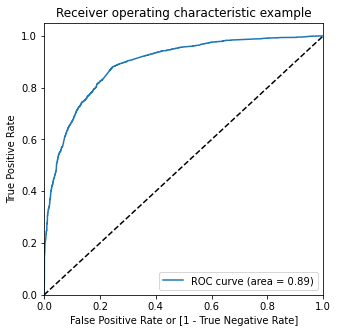

In [95]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

###  10: Optimal Cutoff Point

In [96]:
# Let's create columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.682814,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.715994,113,1,1,1,1,1,1,1,1,1,0,0
2,1,0.733276,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.111965,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.023725,1109,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.628639  0.974005  0.408243
0.2   0.2  0.750475  0.922827  0.640487
0.3   0.3  0.804747  0.869618  0.763349
0.4   0.4  0.812658  0.777417  0.835148
0.5   0.5  0.816456  0.714460  0.881545
0.6   0.6  0.807753  0.638505  0.915759
0.7   0.7  0.788449  0.535337  0.949974
0.8   0.8  0.759968  0.432169  0.969155
0.9   0.9  0.719620  0.298538  0.988336


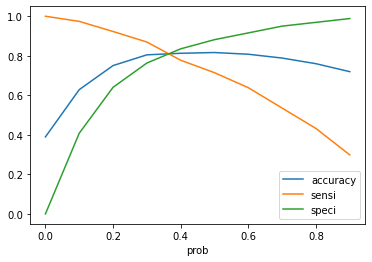

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, `0.37 is the optimum point for a cutoff probability`.**

In [99]:
# Let us make the final prediction using 0.37 as the cut off.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.682814,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.715994,113,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.733276,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.111965,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.023725,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.682814,2240,1,1,1,1,1,1,1,1,0,0,0,1,68
1,0,0.715994,113,1,1,1,1,1,1,1,1,1,0,0,1,72
2,1,0.733276,4132,1,1,1,1,1,1,1,1,1,0,0,1,73
3,0,0.111965,5573,0,1,1,0,0,0,0,0,0,0,0,0,11
4,0,0.023725,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.055276,2282,0,1,0,0,0,0,0,0,0,0,0,0,6
6,1,0.915466,2976,1,1,1,1,1,1,1,1,1,1,1,1,92
7,0,0.471116,8431,0,1,1,1,1,1,0,0,0,0,0,1,47
8,1,0.742905,2770,1,1,1,1,1,1,1,1,1,0,0,1,74
9,1,0.996431,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [101]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1959
0     503
Name: final_predicted, dtype: int64

In [102]:
# check the precentage of final_predicted conversions

1959/float(1959+503)

0.7956945572705117

**The final prediction of conversions have a `target of 79.56% conversion` as per the X Educations CEO's requirement . Hence this is a good model ( as this percentage is close to 80 ).**

In [103]:
# Overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109177215189873

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3166,  692],
       [ 503, 1959]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Sensitivity.

TP / float(TP+FN)

0.7956945572705117

In [107]:
# Specificity.

TN / float(TN+FP)

0.8206324520476931

In [108]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1793675479523069


In [109]:
# Positive predictive value 

print(TP / float(TP+FP))

0.7389664277631083


In [110]:
# Negative predictive value

print(TN / float(TN+ FN))

0.8629054238212047


**`Metrics - Precision and Recall`**

In [111]:
# Confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3401,  457],
       [ 703, 1759]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score, recall_score

In [113]:
# Precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7937725631768953

In [114]:
# Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7144597887896019

### Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve

In [116]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

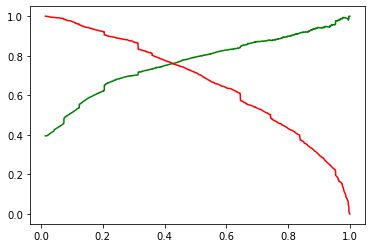

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [119]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [120]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,1,0,0,0,0,0,0,0,0,0,1,0
8697,0,0.4375,0.184032,1,0,0,0,0,0,0,0,0,0,1,0
7378,0,0.1250,0.163284,1,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,0,0,0,1,0,0,0
4799,0,0.5000,0.744700,0,0,0,0,0,0,0,0,0,0,1,0


In [121]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set.

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

2296    0.905844
8697    0.599542
7378    0.187977
8631    0.394805
4799    0.964026
4503    0.359135
7129    0.894553
1717    0.123677
8398    0.848307
5116    0.204467
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head

y_pred_1.head()

,0
2296,0.905844
8697,0.599542
7378,0.187977
8631,0.394805
4799,0.964026


In [126]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [127]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.905844
1,0,8697,0.599542
2,0,7378,0.187977
3,0,8631,0.394805
4,1,4799,0.964026


In [131]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [132]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.905844
1,0,8697,0.599542
2,0,7378,0.187977
3,0,8631,0.394805
4,1,4799,0.964026


In [133]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [134]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.905844,1
1,0,8697,0.599542,1
2,0,7378,0.187977,0
3,0,8631,0.394805,1
4,1,4799,0.964026,1


In [135]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.905844,1,91
1,0,8697,0.599542,1,60
2,0,7378,0.187977,0,19
3,0,8631,0.394805,1,39
4,1,4799,0.964026,1,96
5,0,4503,0.359135,0,36
6,0,7129,0.894553,1,89
7,0,1717,0.123677,0,12
8,0,8398,0.848307,1,85
9,1,5116,0.204467,0,20


In [136]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    803
0    212
Name: final_predicted, dtype: int64

In [137]:
# check the precentage of final_predicted conversions on test data

803/float(803+212)

0.7911330049261084

**Hence we can see that the final prediction of conversions have a target rate of 79% .**

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [138]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8117386489479512

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  298],
       [ 212,  803]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7911330049261084

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8240850059031877

##### Precision and Recall metrics for the test set 

In [143]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7293369663941871
recall  0.7911330049261084


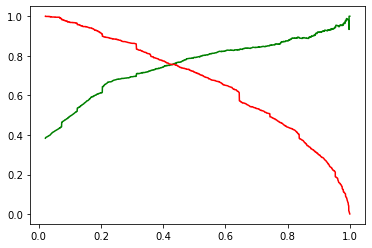

In [144]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal 
      cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 80%
    - Hence overall this model seems to be good.   

# For business recommendation we may conclude that `Lead Source and Last Notable Activity` are important columns and `Lead Source Wellingak Website and Lead Source Reference ` are the most precious .